In [1]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
with open("E:\\Research\\Statue gen output\\NewEA_3.txt", 'r') as f:
    PARAMS = f.readlines()

In [3]:
from ast import literal_eval

In [ ]:
PARAMS=literal_eval(PARAMS[0])

In [ ]:
len(PARAMS)

In [ ]:
GENERATIONS=300
OUTPUT_PATH="E:\Research\Statue Generator\Generations\New EA - 2"
POPULATION_SIZE=10

In [181]:
def shannon_entropy(file_path):
    with open(file_path, "rb") as f:
        bytes = f.read()
    prob = [float(bytes.count(b)) / len(bytes) for b in set(bytes)]
    entropy = -sum([p * math.log(p) / math.log(2.0) for p in prob])
    return round(entropy,6)

In [182]:
%%time

ALL_FITNESS=[]
BEST_FITNESS=[]
GEN_NUM=1

for _ in range(GENERATIONS+1):
    
    PATH_FOR_PREV_GEN=OUTPUT_PATH+"\\GEN_"+str(GEN_NUM-1)
    FITNESS=[]
    
    if (GEN_NUM-1)%50==0:
    
        for i in range(POPULATION_SIZE):

            VERTS=PARAMS[GEN_NUM-1][i][8][0]
            EDGES=PARAMS[GEN_NUM-1][i][8][1]

    #         entropy=shannon_entropy(PATH_FOR_PREV_GEN+f"\\STATUE_{i}.blend")
    #         entropy=entropy/8 

    #         cr=compression_ratio(PATH_FOR_PREV_GEN+f"\\STATUE_{i}.blend")

    #         gr=golden_ratio(VERTS,EDGES)

            v=volume(VERTS)
            p=perimeter(VERTS,EDGES)
    #         print(f"Volume: {v}")
    #         print(f"Perimeter: {p}")

            #fitness=volume+perimeter
            fitness=p/v
            FITNESS.append(round(fitness,6))

        ALL_FITNESS.append(FITNESS)

        BEST_FITNESS.append(FITNESS.index(max(FITNESS)))
        print(f'Statue-{FITNESS.index(max(FITNESS))} has the best fitness value in {GEN_NUM-1} generation.')

    GEN_NUM+=1

Statue-6 has the best fitness value in 0 generation.
Statue-7 has the best fitness value in 50 generation.
Statue-7 has the best fitness value in 100 generation.
Statue-6 has the best fitness value in 150 generation.
Statue-6 has the best fitness value in 200 generation.
Statue-5 has the best fitness value in 250 generation.
Statue-8 has the best fitness value in 300 generation.
Wall time: 31.6 s


In [183]:
GENS=[0,50,100,150,200,250,300]

In [184]:
BEST_FITNESS

[6, 7, 7, 6, 6, 5, 8]

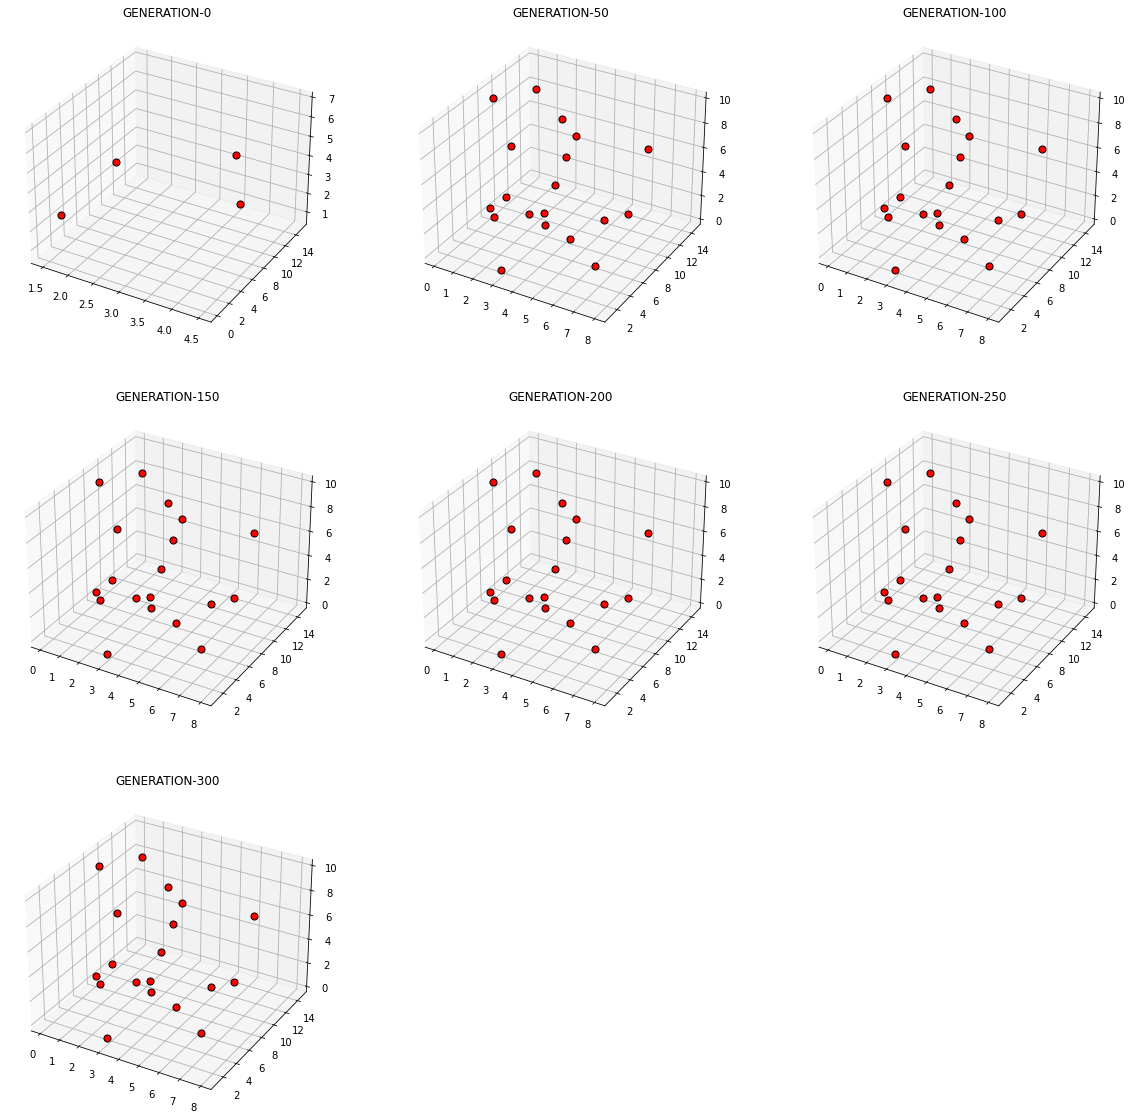

In [185]:
fig = plt.figure(figsize=(20,20))
for i,m in enumerate(BEST_FITNESS):
    model=PARAMS[GENS[i]][m][8][0]
    
    x=[m[0] for m in model]
    y=[m[1] for m in model]
    z=[m[2] for m in model]
    
    ax = fig.add_subplot(3, 3, i+1, projection='3d')
    ax.scatter3D(x,y,z,color="red",depthshade=False,s=50,edgecolor="black")
    ax.title.set_text(f"GENERATION-{GENS[i]}")
    
plt.show()